In [1]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")

In [2]:
points = 10000
key = jax.random.PRNGKey(seed=42)

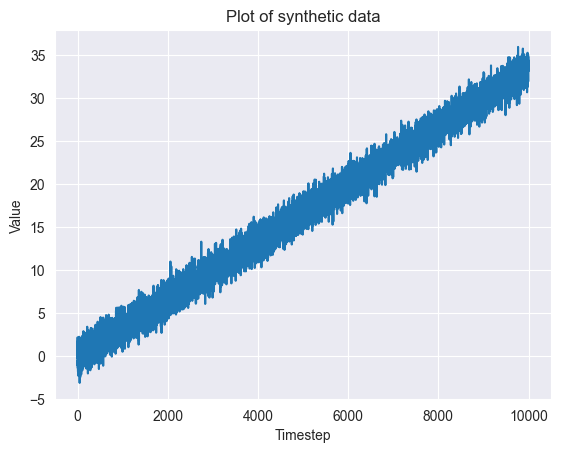

In [3]:
data = jnp.sin(jnp.arange(0, points)) * jnp.cos(jnp.arange(0, points)) + jnp.arange(0, points) * 1/300 + jax.random.normal(key=key, shape=(points,))
sns.lineplot(data)
plt.title("Plot of synthetic data")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.show();

In [4]:
from lstm import LSTM
from pprint import pprint

In [5]:
params = LSTM.init_params(seed=42, input_dim=1, hidden_dim=1, output_dim=1)


In [6]:
zero_arr = jnp.array([[0.]])

In [7]:
params.wf

Array([[-2.169826  ,  0.46480057]], dtype=float32)

In [8]:
jnp.concatenate([zero_arr, zero_arr], axis=1)

Array([[0., 0.]], dtype=float32)

In [9]:
LSTM.f_cur(params, zero_arr, zero_arr)

Array([[0.45395288]], dtype=float32)

In [10]:
LSTM.i_cur(params, zero_arr, zero_arr)

(Array([[0.45395288]], dtype=float32), Array([[-0.18263935]], dtype=float32))

In [11]:
LSTM.c_cur(params, zero_arr, zero_arr, zero_arr)

Array([[-0.08290966]], dtype=float32)

In [12]:
LSTM.h_cur(params, zero_arr, zero_arr, zero_arr)

Array([[-0.03755108]], dtype=float32)

In [13]:
LSTM.forward(params, zero_arr, zero_arr, zero_arr, zero_arr)

(Array([[-0.08290966]], dtype=float32),
 Array([[-0.]], dtype=float32),
 Array([[-0.03755108]], dtype=float32))

In [14]:
print(jnp.array([[0.]])[:,0])

[0.]


In [15]:
LSTM.forward_full(params, jnp.array([[0.]]))

Array([[[0.00693613]]], dtype=float32)

In [16]:
def preprocess_ts(
    x: jnp.ndarray, 
    y: jnp.ndarray,
    timestep: int
) -> tuple[jnp.ndarray, jnp.ndarray]:
    x_window = np.lib.stride_tricks.sliding_window_view(
        x, window_shape=(timestep,), axis=0
    )
    y_window = np.lib.stride_tricks.sliding_window_view(
        y, window_shape=(timestep,), axis=0
    )

    return jnp.array(x_window), jnp.array(y_window)




In [17]:
x_window, y_window = preprocess_ts(np.arange(points).astype(np.float32), data, 5)

In [18]:
x_window

Array([[0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00],
       [1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00],
       [2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 6.000e+00],
       ...,
       [9.993e+03, 9.994e+03, 9.995e+03, 9.996e+03, 9.997e+03],
       [9.994e+03, 9.995e+03, 9.996e+03, 9.997e+03, 9.998e+03],
       [9.995e+03, 9.996e+03, 9.997e+03, 9.998e+03, 9.999e+03]],      dtype=float32)

In [19]:
params = LSTM.init_params(seed=42, input_dim=5, hidden_dim=10, output_dim=1)

In [22]:
for batch in x_window:
    print(LSTM.forward_full(params, jnp.expand_dims(batch, -1)))

[[[-0.51489186]]]
[[[-0.5993699]]]
[[[-0.97175884]]]
[[[-1.107505]]]
[[[-1.1462475]]]
[[[-1.158452]]]
[[[-1.1644766]]]
[[[-1.1699584]]]
[[[-1.1760077]]]
[[[-1.1813369]]]
[[[-1.1820778]]]
[[[-1.171953]]]
[[[-1.1453786]]]
[[[-1.1034487]]]
[[[-1.0551744]]]
[[[-1.0100963]]]
[[[-0.9726852]]]
[[[-0.94330657]]]
[[[-0.92076105]]]
[[[-0.9036259]]]
[[[-0.8906634]]]
[[[-0.88088685]]]
[[[-0.8735288]]]
[[[-0.8679988]]]
[[[-0.8638461]]]
[[[-0.86072785]]]
[[[-0.8583848]]]
[[[-0.85662127]]]
[[[-0.85529083]]]
[[[-0.85428286]]]
[[[-0.85351545]]]
[[[-0.85292673]]]
[[[-0.85247135]]]
[[[-0.85211486]]]
[[[-0.85183185]]]
[[[-0.85160357]]]
[[[-0.8514159]]]
[[[-0.85125846]]]
[[[-0.8511232]]]
[[[-0.8510048]]]
[[[-0.8508986]]]
[[[-0.85080165]]]
[[[-0.8507114]]]
[[[-0.850626]]]
[[[-0.8505446]]]
[[[-0.8504657]]]
[[[-0.850389]]]
[[[-0.8503136]]]
[[[-0.8502396]]]
[[[-0.8501662]]]
[[[-0.8500933]]]
[[[-0.85002095]]]
[[[-0.8499489]]]
[[[-0.8498772]]]
[[[-0.8498055]]]
[[[-0.8497338]]]
[[[-0.8496624]]]
[[[-0.849591]]]
[[

In [21]:
jnp.concatenate([jnp.array([[1.], [2.], [3.]]), jnp.array([[1.], [2.], [3.]])], axis=1)

Array([[1., 1.],
       [2., 2.],
       [3., 3.]], dtype=float32)